In [21]:
!sh slurm_mongo.sh

'sh' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!sh slurm_mongoreader.sh

In [ ]:
!sh slurm_testalgo.sh

In [ ]:
!sh slurm_trainalgo.sh

***

### Convert CSV to Mongo

In [12]:
%run csvToMng.py

['skill', 'salary', 'openings', 'targets_training\n']


### Convert Mongo to CSV

In [13]:
%run mongoreader.py

### Train ML Model

In [14]:
%run ml_train.py

### Visualize data

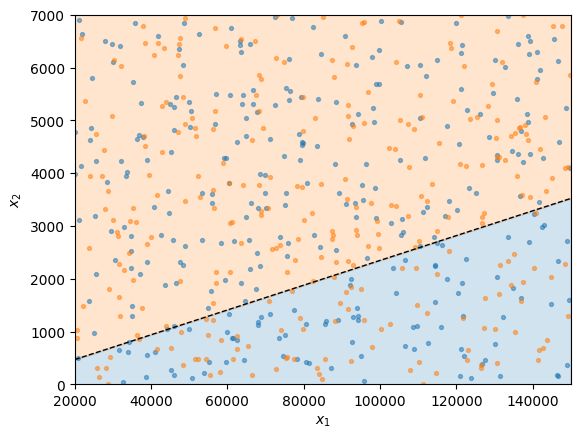

In [15]:
%run plotter.py

### Test ML Model

In [16]:
%run ml_test.py

### Display output

In [17]:
with open('useful_skills.txt', 'r') as file:
    content = file.read()
    print(content)

Guided Imagery
RNA Isolation
Static Timing Analysis
GNU tools
Executive Coaching
OnQ
NG-SDH
Sybase SQL Anywhere
Sports Marketing
WWAN
Animal Behavior
VRS
GWAPT
Channel Partners
eBusiness Suite
Intergovernmental Affairs
Unicenter TNG
Kosher
RELAX NG
TV News Production
HTML Emails
Short Films
Kurzweil
Linux KVM
SRTP
gPROMS
Concept HDL
Karaoke
Pulse Oximetry
Hospitals
IntelliJ IDEA
Web Applications
LN
IWR
UCCE
Umbrella Insurance
TMA
Airports
Amazon VPC
Java
Certified EKG Technician
Summation iBlaze
Brand Equity
Flights
Light Rail
Slogans
VMI Programs
AHP
Agents
NCQA
MPages
NFC
Ukrainian
EP
GXT
SNMP
Vegetables
Whole Life
JSLint
Slide Preparation
SketchUp
Kalman filtering
Mortgage Lending
Ffmpeg
Yachting
Jetty
LWUIT
PDP
Swedish
ASIC
RS485
CFTC
IPTV
Diabetes
QlikView
Eplan
LynxOS
GWT
IPS
dsPIC
SBA
HSSE
ATM Networks
Open XML
Oil &amp; Gas Industry
JProbe
Radiology
EOL
SAP MM Module
UMA
Jidoka
Portfolio Management
XSS
After FX
JDF
Restorative Justice
EMS
MDSD
Network Administration
TBMCS
Varia